In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline

In [12]:
credit_data = pd.read_csv("../data/Simulated_Data_Train.csv")
credit_data.dtypes

tot_credit_debt                       float64
avg_card_debt                         float64
credit_age                            float64
credit_good_age                       float64
card_age                              float64
non_mtg_acc_past_due_12_months_num    float64
non_mtg_acc_past_due_6_months_num     float64
mortgages_past_due_6_months_num       float64
credit_past_due_amount                float64
inq_12_month_num                      float64
card_inq_24_month_num                 float64
card_open_36_month_num                float64
auto_open_ 36_month_num               float64
uti_card                              float64
uti_50plus_pct                        float64
uti_max_credit_line                   float64
uti_card_50plus_pct                   float64
ind_acc_XYZ                           float64
rep_income                            float64
States                                 object
Default_ind                           float64
dtype: object

In [100]:
###Numerical Data
num_data = ["tot_credit_debt", 
            "avg_card_debt", 
            "credit_age", 
            "credit_good_age", 
            "non_mtg_acc_past_due_12_months_num", 
            "non_mtg_acc_past_due_6_months_num", 
            "mortgages_past_due_6_months_num", 
            "credit_past_due_amount",
            "inq_12_month_num", 
            "card_inq_24_month_num", 
            "card_open_36_month_num", 
            "auto_open_ 36_month_num", 
            "uti_card", 
            "uti_50plus_pct",
            "uti_max_credit_line", 
            "rep_income"]
plt.rcParams["figure.figsize"] = [40, 40]
plt.rcParams["figure.dpi"] = 300
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(4, 4)
colors = ["orange", "red", "blue", "green"]
for row in range(4): 
    color = colors[row]
    for col in range(4): 
        feature = num_data[4*row + col]
        ax[row][col].set_title(f"Distribution of {feature}")
        ax[row][col].hist(credit_data[feature], color = color)

plt.savefig("dist.png")

In [97]:
### Categorical Data

cat_data = ["non_mtg_acc_past_due_12_months_num", 
            "non_mtg_acc_past_due_6_months_num", 
            "mortgages_past_due_6_months_num", 
            "card_open_36_month_num", 
            "auto_open_ 36_month_num",
            "Default_ind", 
            "ind_acc_XYZ",
            "States"]

plt.rcParams["figure.figsize"] = [40, 20]
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2, 4)

colors = ["red", "black", "orange", "purple"]

for row in range(2): 
    for col in range(4): 
        color = colors[col]
        feature = cat_data[4*row + col]
        ax[row][col].set_title(f"Counts for {feature}")
        bars = list(credit_data[feature].unique())
        bars.sort()
        ax[row][col].bar(x = bars, 
                         height = credit_data[feature].value_counts(normalize = True).values,
                         color = color)

    
plt.savefig("counts.png")

In [104]:
credit_data[num_data].describe().transpose().drop(columns = ["count", "25%", "50%", "75%"]).to_latex("../report/numerical.tex")

In [99]:
credit_data[cat_data].value_counts().to_latex("../report/categorical.tex")

In [11]:
state_analysis_cols = ['tot_credit_debt', 'credit_good_age', 'non_mtg_acc_past_due_12_months_num',
                       'uti_max_credit_line', 'rep_income', 'Default_ind', 'States']
state_data = credit_data[state_analysis_cols].sample(1000)
state_data.fillna(state_data.mean())
state_data["state_code"] = state_data.States.map({"AL": 0, "LA": 1, "SC": 2, "FL": 3, "SC": 4, "GA": 5, "MS": 6, "NC": 7})
states = ["AL", "LA", "SC", "FL", "SC", "GA", "MS", "NC"]

pairs = [(i, j) for i in range(len(state_analysis_cols) - 1) 
                for j in range(len(state_analysis_cols) - 1)
                if i < j]


len(pairs)

plt.rcParams["figure.figsize"] = [50, 30]
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(3, 5)

for row in range(3): 
    for col in range(5): 
        feature1, feature2 = pairs[3 * row + col]
        ax[row][col].set_title(f"{state_analysis_cols[feature1]} vs. {state_analysis_cols[feature2]}")

        for i in range(7): 
            xs = state_data[state_data["state_code"] == i][state_analysis_cols[feature1]]
            ys = state_data[state_data["state_code"] == i][state_analysis_cols[feature2]]
            ax[row][col].scatter(xs, ys, marker = "x", label = states[i])

ax[0][0].legend()   
plt.savefig("States.png")

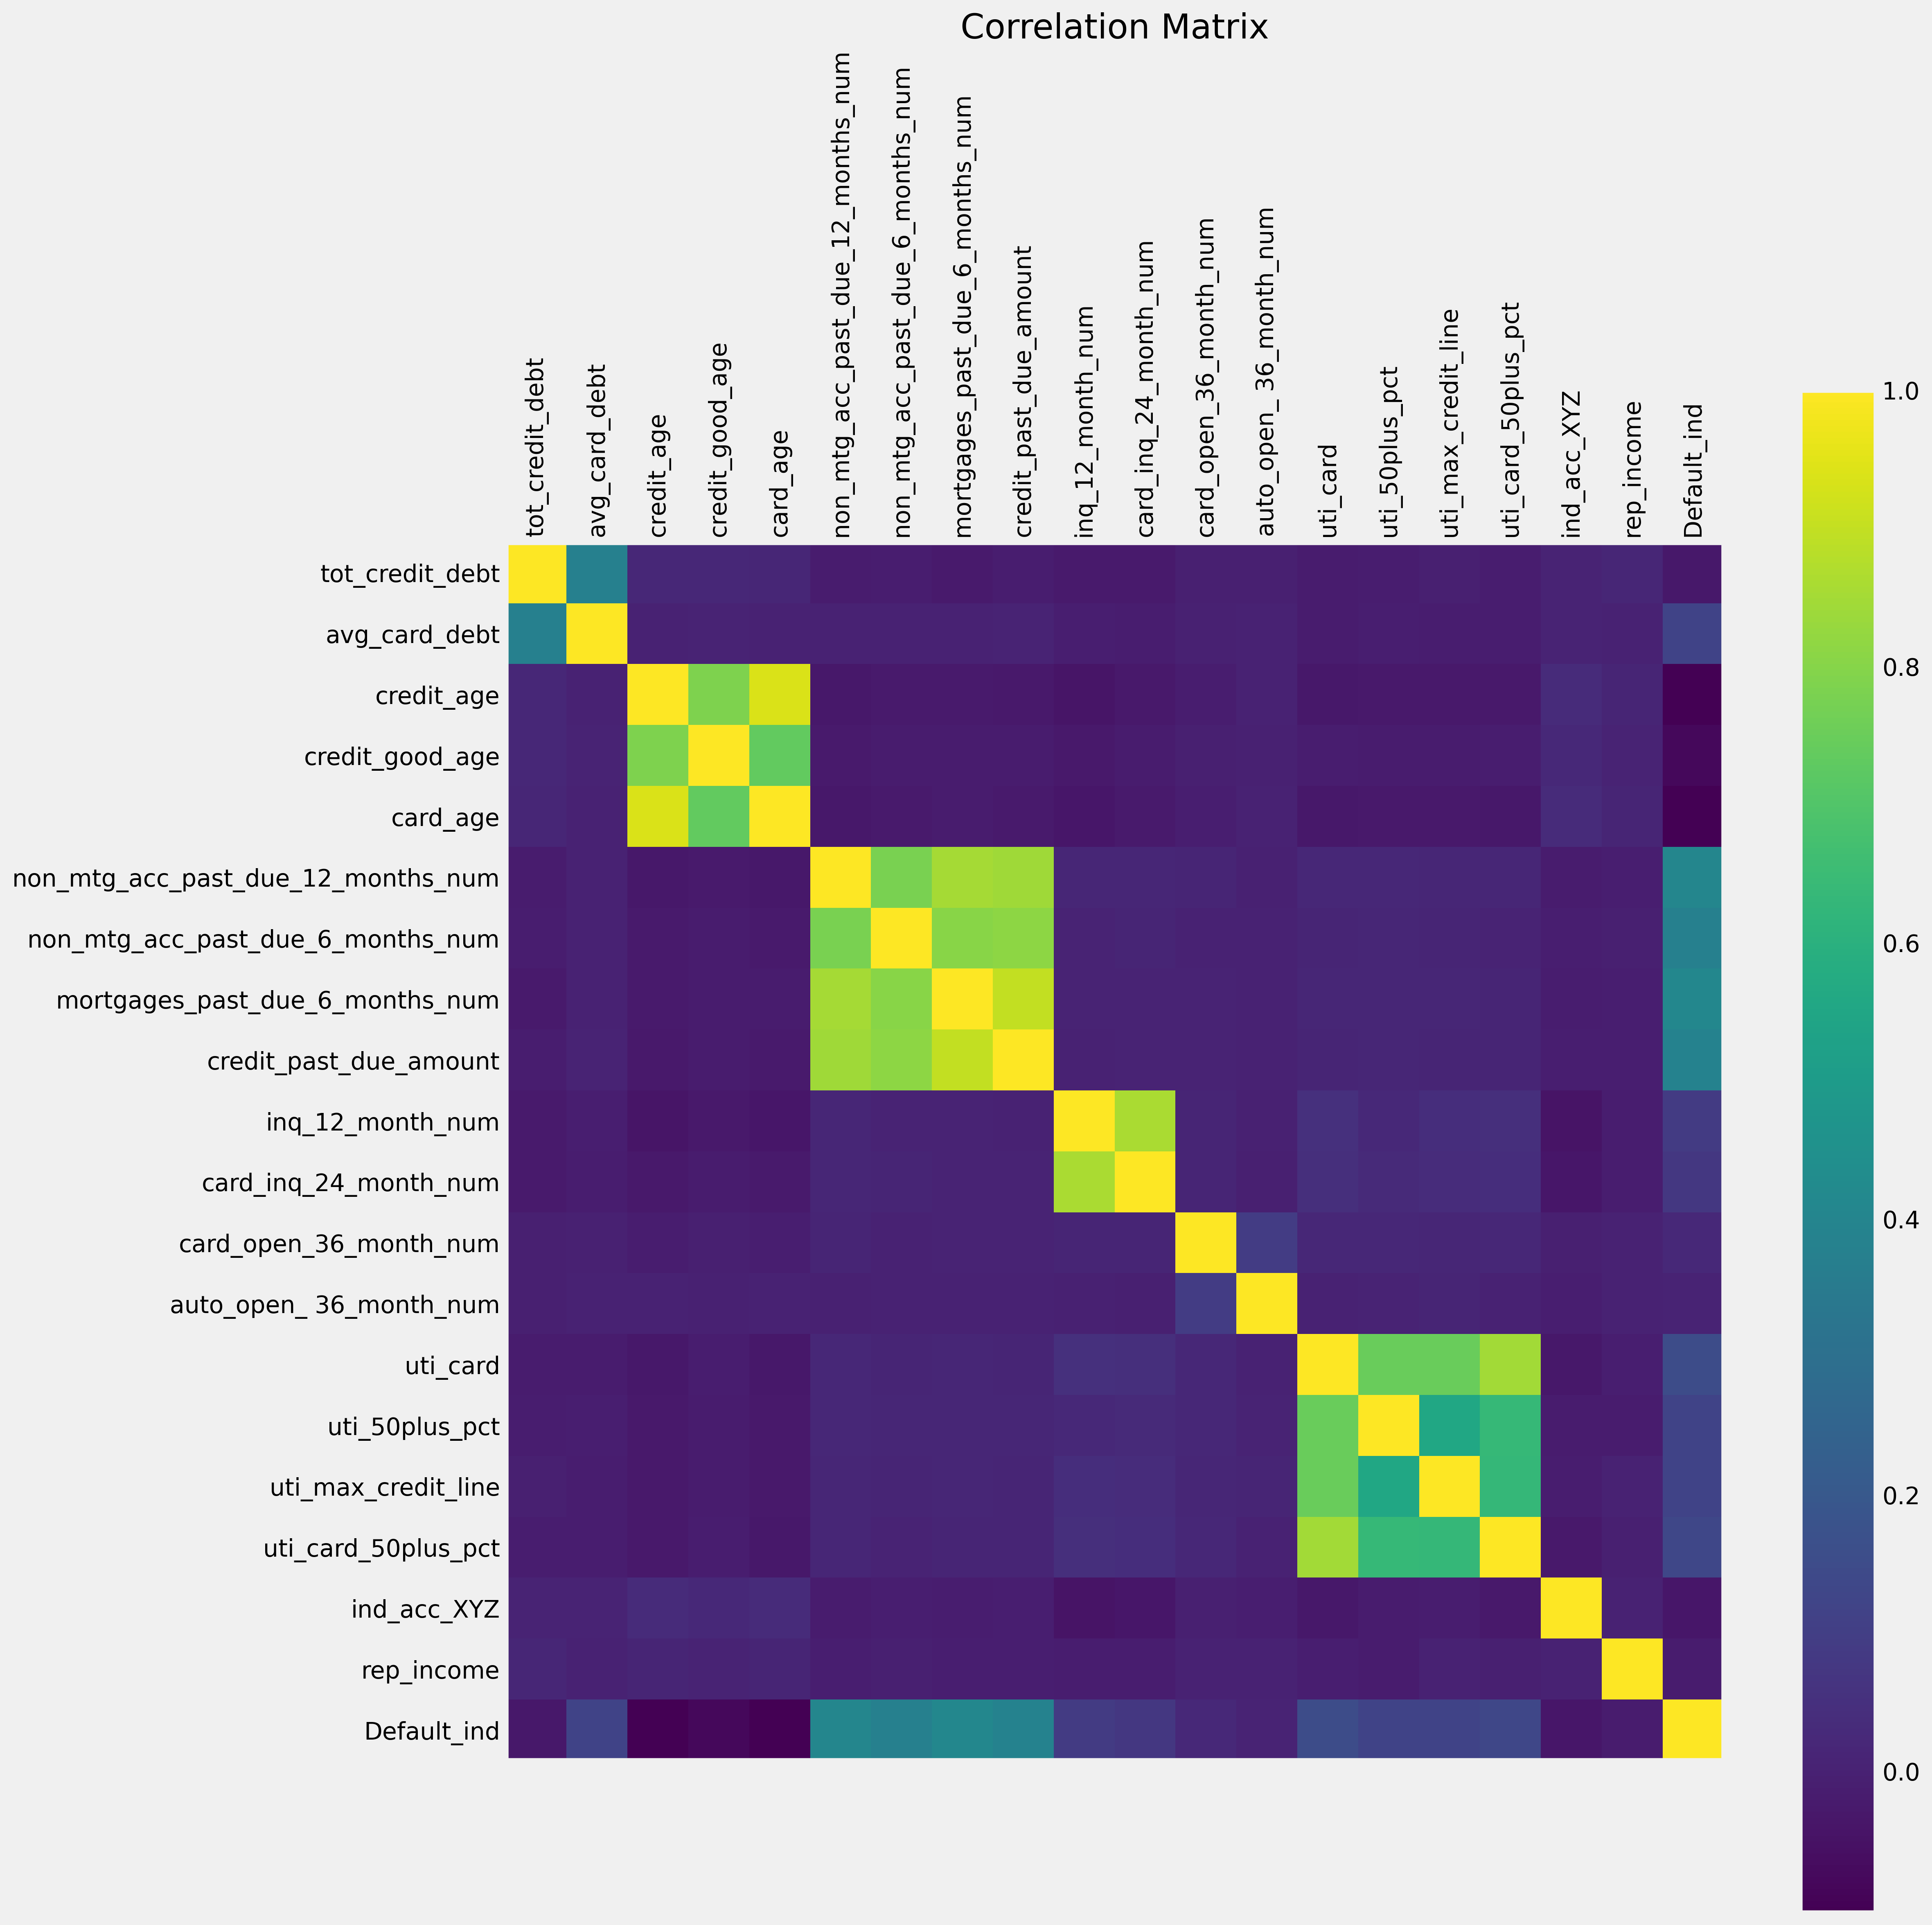

<Figure size 6000x6000 with 0 Axes>

In [10]:
col_names = list(credit_data.select_dtypes("number").columns)

plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.dpi"] = 300

plt.style.use("fivethirtyeight")
plt.matshow(credit_data.corr())
plt.xticks(np.arange(len(col_names)), labels = col_names, rotation = 90)
plt.yticks(range(len(col_names)), labels = col_names)
plt.grid(b = None)
plt.title("Correlation Matrix")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()
plt.savefig("CorMat.png")